<a href="https://colab.research.google.com/github/gauthamys/UIC_CS483/blob/main/Melodify_metadata_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melodify

## Dependencies

In [ ]:
! pip install librosa numpy scikit-learn torch transformers

## Preprocessing


In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


### Metadata

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

# Step 1: Data Ingestion

# Load the datasets from the specified folder in the drive
albums_df = pd.read_csv('/content/drive/My Drive/CS483_Data/Albums.csv')
artists_df = pd.read_csv('/content/drive/My Drive/CS483_Data/Artists.csv')
users_df = pd.read_excel('/content/drive/My Drive/CS483_Data/Users.xlsx')

# Step 2: Data Preprocessing
# Data Cleaning Module
albums_df.drop_duplicates(inplace=True)
artists_df.drop_duplicates(inplace=True)
users_df.drop_duplicates(inplace=True)

# Handle missing values
albums_df.fillna(method='ffill', inplace=True)
artists_df.fillna(method='ffill', inplace=True)
users_df.fillna(method='ffill', inplace=True)

print('______ALBUM________')
print(albums_df.info())
print('______ARTIST________')
print(artists_df.info())
print('______USER________')
print(users_df.info())

<ipython-input-3-d45859d0adf0>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  albums_df.fillna(method='ffill', inplace=True)
<ipython-input-3-d45859d0adf0>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  artists_df.fillna(method='ffill', inplace=True)
<ipython-input-3-d45859d0adf0>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  users_df.fillna(method='ffill', inplace=True)


______ALBUM________
<class 'pandas.core.frame.DataFrame'>
Index: 28743 entries, 0 to 28942
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   artist          28743 non-null  object
 1   album           28743 non-null  object
 2   mbid            28743 non-null  object
 3   listeners       28743 non-null  int64 
 4   playcount       28743 non-null  int64 
 5   tracks          28743 non-null  object
 6   tags            28743 non-null  object
 7   similar_tracks  28743 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.0+ MB
None
______ARTIST________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11777 entries, 0 to 11776
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      11777 non-null  int64  
 1   Name            11777 non-null  object 
 2   MBID            11777 non-null  object 
 3   similar_artist  11777 

In [ ]:
albums_df.head()

,artist,album,mbid,listeners,playcount,tracks,tags,similar_tracks
0,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Duvet,"['anime', 'serial experiments lain', 'british'...","Komm, Susser Tod (M-10 Director's Edit Version..."
1,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Twilight,"['anime', 'serial experiments lain', 'british'...","Elephant, Deeply, Brand New City, Advice, Just..."
2,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Fool,"['anime', 'serial experiments lain', 'british'...","Rain, Scoring"
3,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Rain,"['anime', 'serial experiments lain', 'british'...","Scoring, Fool"
4,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Elephant,"['anime', 'serial experiments lain', 'british'...","Rain, Fool"


In [ ]:
artists_df.head()

,Unnamed: 0,Name,MBID,similar_artist,listeners,play_counts,tags,summary,top_album,Unnamed: 9,top_songs
0,0,Nirvana,9282c8b4-ca0b-4c6b-b7e3-4f7762dfc4d6,"['Kurt Cobain', 'Alice in Chains', 'Soundgarde...",6297168,418658293,"['Grunge', 'rock', 'alternative', 'alternative...","There are multiple artists tracked as ""Nirvana...","Nevermind, In Utero, MTV Unplugged in New York...",NaN,"Smells Like Teen Spirit, Come as You Are, Lith..."
1,1,The Killers,95e1ead9-4d31-4808-a7ac-32c3614c116b,"['Brandon Flowers', 'Kings of Leon', 'Snow Pat...",5950326,291647767,"['indie', 'rock', 'indie rock', 'alternative',...",There are multiple artists using this name:\n\...,"Hot Fuss, Sam's Town, Day & Age, Sawdust, Dire...",NaN,"Mr. Brightside, Somebody Told Me, When You Wer..."
2,2,Radiohead,a74b1b7f-71a5-4011-9441-d0b5e4122711,"['Thom Yorke', 'Atoms for Peace', 'Jeff Buckle...",6815000,928426766,"['alternative', 'alternative rock', 'rock', 'i...",Radiohead are an English rock band formed in A...,"OK Computer, In Rainbows, Pablo Honey, The Ben...",NaN,"Creep, Karma Police, No Surprises, Paranoid An..."
3,3,Gorillaz,e21857d5-3256-4547-afb3-4b6ded592596,"['Damon Albarn', 'The Good, the Bad & the Quee...",5617912,363054163,"['alternative', 'electronic', 'Hip-Hop', 'rock...",Gorillaz are a British virtual band created in...,"Demon Days, Gorillaz, Plastic Beach, Humanz (D...",NaN,"Feel Good Inc., Clint Eastwood, DARE, On Melan..."
4,4,Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,"['Keane', 'Imagine Dragons', 'Snow Patrol', 'T...",7710436,592812260,"['rock', 'alternative', 'britpop', 'alternativ...",Coldplay are a britpop band formed in London i...,"Parachutes, A Rush of Blood to the Head, Viva ...",NaN,"Yellow, Viva la Vida, The Scientist, Clocks, F..."


[1284128, 1284128, 1284128, 1284128, 1284128, 1284128, 1284128, 1284128, 1284128, 1284128, 1284128, 1284128, 1284128, 1665427, 1665427, 1665427, 1665427, 1665427, 1398176, 1398176, 1665427, 1665427, 1665427, 1665427, 1665427, 1104715, 1665427, 1665427, 1665427, 1665427, 2322665, 2322665, 2322665, 136252, 2322665, 454582, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 2322665, 1738385, 1738385, 1738385, 1738385, 1738385, 1738385, 1677218, 1677218, 1677218, 1677218, 1738385, 1677218, 1677218, 1677218, 1677218, 1677218, 1677218, 1677218, 1202793, 1202793, 1202793, 1202793, 1202793, 1202793, 1202793, 1202793, 1202793, 1202793, 1202793, 1202793, 1205089, 1205089, 1205089, 1205089, 1205089, 1082736, 1205089, 1082736, 1205089, 1082736, 1082736, 1084971, 1084971, 1084971, 1084971, 1084971, 1084971, 1084971, 1084971, 1084971, 10

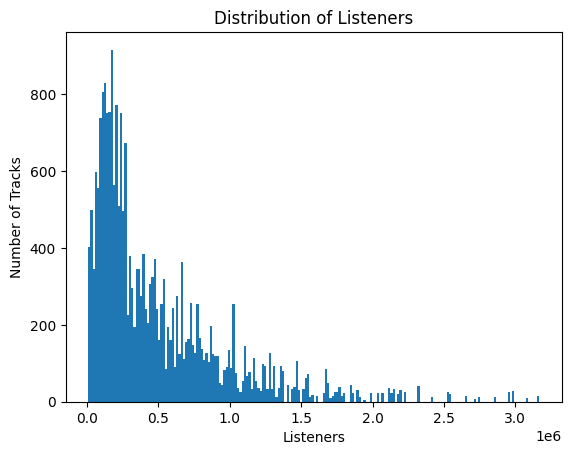

In [ ]:
counts = []
for row in albums_df.iterrows():
  sim = row[1]['similar_tracks'].split(',')
  for track in set(sim):
    # get the row where 'tracks' == track
    r = albums_df[albums_df['tracks'] == track]
    if not r.empty:
      #print(r.iloc[0]['playcount'])
      counts.append(r.iloc[0]['listeners'])
print(counts)
#counts = list(set(counts))
# plot the number of tracks for each playcount range and print the absolute ranges of each bin
import matplotlib.pyplot as plt
plt.hist(counts, bins=200)
plt.xlabel('Listeners')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Listeners')
plt.show()


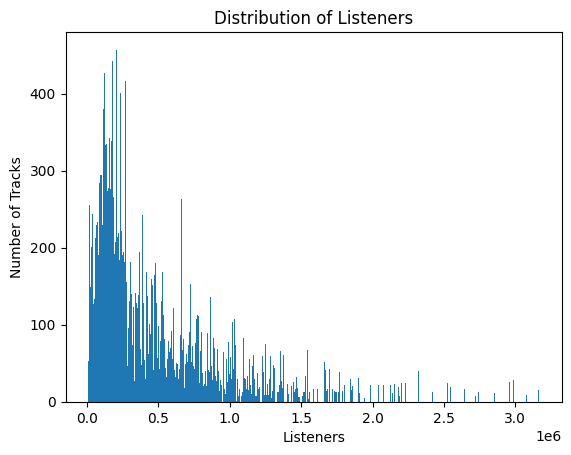

In [ ]:
import matplotlib.pyplot as plt
plt.hist(counts, bins=500)
plt.xlabel('Listeners')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Listeners')
plt.show()


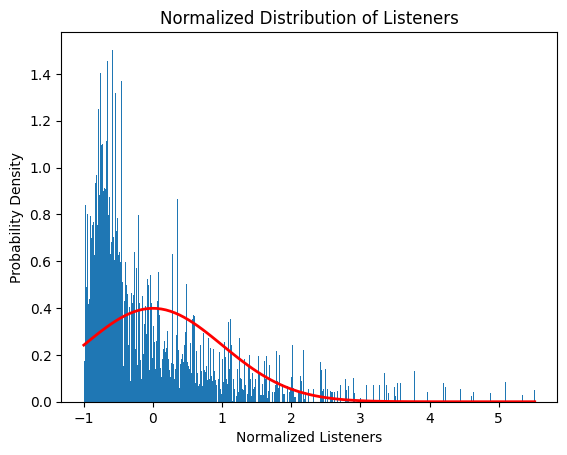

In [ ]:
# prompt: normalise counts and plot it as a normal distribution

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'counts' is already defined from the previous code
# Normalize the counts
normalized_counts = (counts - np.mean(counts)) / np.std(counts)

# Plot the normalized counts as a normal distribution
plt.hist(normalized_counts, bins=500, density=True)  # density=True for normalized histogram

# Overlay a normal distribution curve
x = np.linspace(min(normalized_counts), max(normalized_counts), 100)
plt.plot(x, 1/(np.std(normalized_counts) * np.sqrt(2 * np.pi)) * np.exp( - (x - np.mean(normalized_counts))**2 / (2 * np.std(normalized_counts)**2) ), linewidth=2, color='r')


plt.xlabel('Normalized Listeners')
plt.ylabel('Probability Density')
plt.title('Normalized Distribution of Listeners')
plt.show()

In [ ]:
np.median(counts)

311322.5

In [ ]:
np.mean(counts)

492776.6047888774

In [ ]:
min(counts)

8508

In [ ]:
max(counts)

3166470

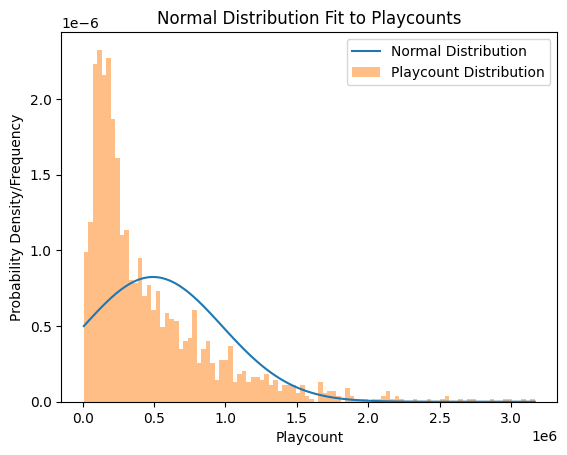

In [ ]:
# prompt: plot a normal distribution with the counts list

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'counts' is already defined from the previous code

# Calculate the mean and standard deviation of the counts
mu = np.mean(counts)
sigma = np.std(counts)

# Generate x values for the normal distribution plot
x = np.linspace(min(counts), max(counts), 100)

# Calculate the probability density function (PDF) of the normal distribution
from scipy.stats import norm
pdf = norm.pdf(x, mu, sigma)


# Plot the normal distribution
plt.plot(x, pdf, label='Normal Distribution')

# Plot the histogram of the counts for comparison
plt.hist(list(set(counts)), bins=100, density=True, alpha=0.5, label='Playcount Distribution')  # density=True to normalize the histogram

# Customize the plot
plt.xlabel('Playcount')
plt.ylabel('Probability Density/Frequency')
plt.title('Normal Distribution Fit to Playcounts')
plt.legend()
plt.show()

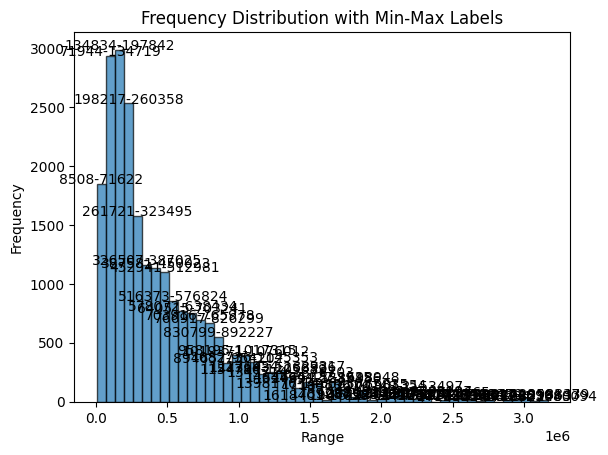

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your list of numbers
data = counts

# Number of bins (ranges)
num_bins = 50

# Create the histogram
acounts, bin_edges, _ = plt.hist(data, bins=num_bins, edgecolor='black', alpha=0.7)

# Assign data points to bins
bin_indices = np.digitize(data, bin_edges)

# Add labels for the min and max values in each bin
for i in range(1, len(bin_edges)):
    # Filter data for the current bin
    values_in_bin = [val for val, idx in zip(data, bin_indices) if idx == i]
    if values_in_bin:  # If there are values in this bin
        bin_min = min(values_in_bin)
        bin_max = max(values_in_bin)
        # Get bin center for positioning the text
        bin_center = (bin_edges[i - 1] + bin_edges[i]) / 2
        # Add text above the bar
        plt.text(bin_center, acounts[i - 1] + 0.2, f"{bin_min}-{bin_max}",
                 ha='center', fontsize=10)

# Add labels and title
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.title('Frequency Distribution with Min-Max Labels')

# Show the plot
plt.show()


# Include From Here

In [ ]:
# get the unique tags from all artists and albums
unique_tags = set()
for tags in artists_df['tags']:
    val = tags.replace('[', '').replace(']', '').replace("'", '').split(', ')
    unique_tags.update(val)

for tags in albums_df['tags']:
    val = tags.replace('[', '').replace(']', '').replace("'", '').split(', ')
    unique_tags.update(val)

print(len(unique_tags))

4049


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import gensim.downloader as api

# Load the pre-trained Word2Vec model
try:
    model = api.load('word2vec-google-news-300')
except Exception as e:
    print(f"Error loading word2vec model: {e}")
    print("Trying to download the model...")
    model = api.load('word2vec-google-news-300')


def get_embedding(tags):
    embeddings = []
    for tag in word_tokenize(tags):
      try:
        embeddings.append(model[tag])
      except KeyError:
          # Handle words not in vocabulary (e.g., use a zero vector or a special token)
          embeddings.append(np.zeros(300)) # Or handle differently based on your needs.
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(300)


albums_df['tag_embedding'] = albums_df['tags'].apply(lambda x: get_embedding(x.replace('[', '').replace(']', '').replace("'", '')))
artists_df['tag_embedding'] = artists_df['tags'].apply(lambda x: get_embedding(x.replace('[', '').replace(']', '').replace("'", '')))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
albums_df.head()


,artist,album,mbid,listeners,playcount,tracks,tags,similar_tracks,tag_embedding
0,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Duvet,"['anime', 'serial experiments lain', 'british'...","Komm, Susser Tod (M-10 Director's Edit Version...","[0.021059672037760418, 0.032468159993489586, 0..."
1,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Twilight,"['anime', 'serial experiments lain', 'british'...","Elephant, Deeply, Brand New City, Advice, Just...","[0.021059672037760418, 0.032468159993489586, 0..."
2,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Fool,"['anime', 'serial experiments lain', 'british'...","Rain, Scoring","[0.021059672037760418, 0.032468159993489586, 0..."
3,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Rain,"['anime', 'serial experiments lain', 'british'...","Scoring, Fool","[0.021059672037760418, 0.032468159993489586, 0..."
4,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Elephant,"['anime', 'serial experiments lain', 'british'...","Rain, Fool","[0.021059672037760418, 0.032468159993489586, 0..."


In [ ]:
artists_df.head()

,Unnamed: 0,Name,MBID,similar_artist,listeners,play_counts,tags,summary,top_album,Unnamed: 9,top_songs,tag_embedding
0,0,Nirvana,9282c8b4-ca0b-4c6b-b7e3-4f7762dfc4d6,"['Kurt Cobain', 'Alice in Chains', 'Soundgarde...",6297168,418658293,"['Grunge', 'rock', 'alternative', 'alternative...","There are multiple artists tracked as ""Nirvana...","Nevermind, In Utero, MTV Unplugged in New York...",NaN,"Smells Like Teen Spirit, Come as You Are, Lith...","[0.0396484375, -0.03963623046875, -0.026635742..."
1,1,The Killers,95e1ead9-4d31-4808-a7ac-32c3614c116b,"['Brandon Flowers', 'Kings of Leon', 'Snow Pat...",5950326,291647767,"['indie', 'rock', 'indie rock', 'alternative',...",There are multiple artists using this name:\n\...,"Hot Fuss, Sam's Town, Day & Age, Sawdust, Dire...",NaN,"Mr. Brightside, Somebody Told Me, When You Wer...","[0.024547230113636364, -0.06550181995738637, -..."
2,2,Radiohead,a74b1b7f-71a5-4011-9441-d0b5e4122711,"['Thom Yorke', 'Atoms for Peace', 'Jeff Buckle...",6815000,928426766,"['alternative', 'alternative rock', 'rock', 'i...",Radiohead are an English rock band formed in A...,"OK Computer, In Rainbows, Pablo Honey, The Ben...",NaN,"Creep, Karma Police, No Surprises, Paranoid An...","[0.012548828125, -0.06229248046875, -0.0531982..."
3,3,Gorillaz,e21857d5-3256-4547-afb3-4b6ded592596,"['Damon Albarn', 'The Good, the Bad & the Quee...",5617912,363054163,"['alternative', 'electronic', 'Hip-Hop', 'rock...",Gorillaz are a British virtual band created in...,"Demon Days, Gorillaz, Plastic Beach, Humanz (D...",NaN,"Feel Good Inc., Clint Eastwood, DARE, On Melan...","[0.008083767361111112, -0.05522325303819445, -..."
4,4,Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,"['Keane', 'Imagine Dragons', 'Snow Patrol', 'T...",7710436,592812260,"['rock', 'alternative', 'britpop', 'alternativ...",Coldplay are a britpop band formed in London i...,"Parachutes, A Rush of Blood to the Head, Viva ...",NaN,"Yellow, Viva la Vida, The Scientist, Clocks, F...","[0.0134521484375, -0.04891357421875, -0.031713..."


In [ ]:
len(albums_df), len(artists_df)

(28743, 11777)

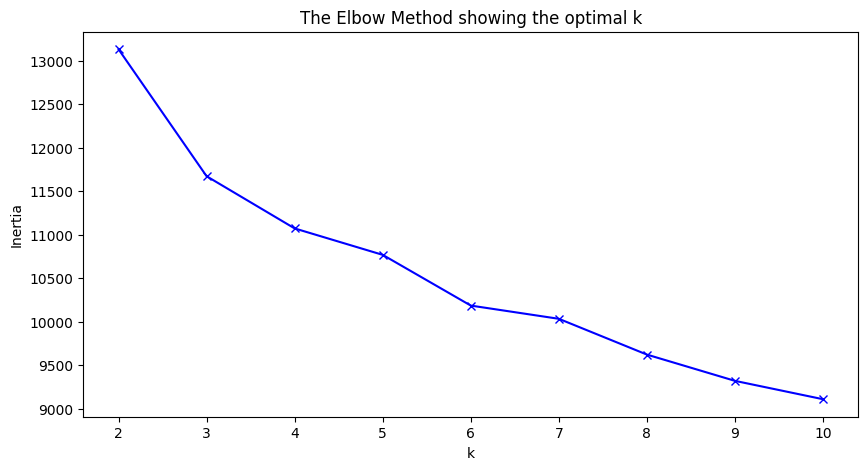

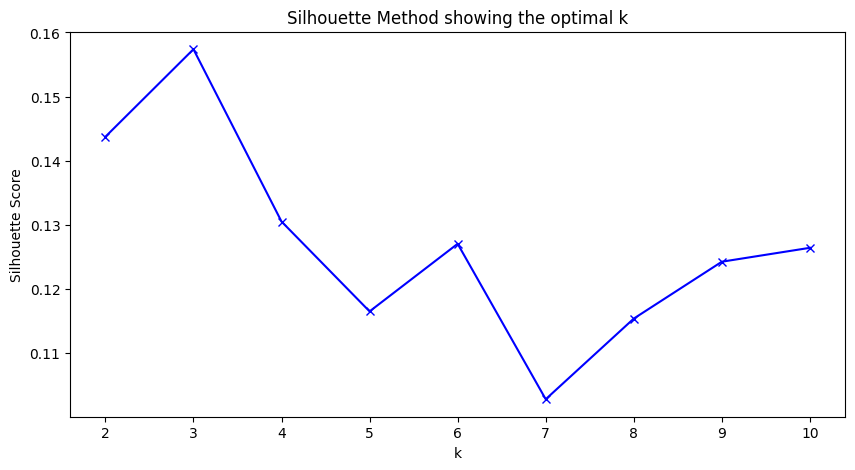

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Combine tag embeddings from albums and artists
tag_embeddings = albums_df['tag_embedding'].tolist()

# Determine optimal k using the elbow method
inertia = []
silhouette_avg = []
K = range(2, 11)  # Test k values from 2 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)  # Initialize KMeans with random_state for reproducibility
    kmeans.fit(tag_embeddings)
    inertia.append(kmeans.inertia_)

    # Calculate silhouette score
    cluster_labels = kmeans.labels_
    if len(np.unique(cluster_labels)) > 1:  # Silhouette score needs at least two clusters
      silhouette_avg.append(silhouette_score(tag_embeddings, cluster_labels))
    else:
      silhouette_avg.append(0) # Or another appropriate value for a single cluster

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#Plot the silhouette method graph
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method showing the optimal k')
plt.show()


#Optimal k is the value where the inertia starts to decrease linearly.
#Optimal k is the k with highest silhouette score.
#You can manually select the optimal k from the plots or using other methods.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Determine the number of clusters (you might need to experiment with this value)
num_clusters = 7  # Example: 10 clusters

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10) # n_init increased for better results
kmeans.fit(albums_df['tag_embedding'].tolist())

# Add cluster labels to the DataFrames
albums_df['cluster'] = kmeans.labels_[:len(albums_df)]

# Now you have the cluster labels in 'cluster' column of both DataFrames
albums_df.head()

,artist,album,mbid,listeners,playcount,tracks,tags,similar_tracks,tag_embedding,cluster
0,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Duvet,"['anime', 'serial experiments lain', 'british'...","Komm, Susser Tod (M-10 Director's Edit Version...","[0.021059672037760418, 0.032468159993489586, 0...",2
1,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Twilight,"['anime', 'serial experiments lain', 'british'...","Elephant, Deeply, Brand New City, Advice, Just...","[0.021059672037760418, 0.032468159993489586, 0...",2
2,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Fool,"['anime', 'serial experiments lain', 'british'...","Rain, Scoring","[0.021059672037760418, 0.032468159993489586, 0...",2
3,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Rain,"['anime', 'serial experiments lain', 'british'...","Scoring, Fool","[0.021059672037760418, 0.032468159993489586, 0...",2
4,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Elephant,"['anime', 'serial experiments lain', 'british'...","Rain, Fool","[0.021059672037760418, 0.032468159993489586, 0...",2


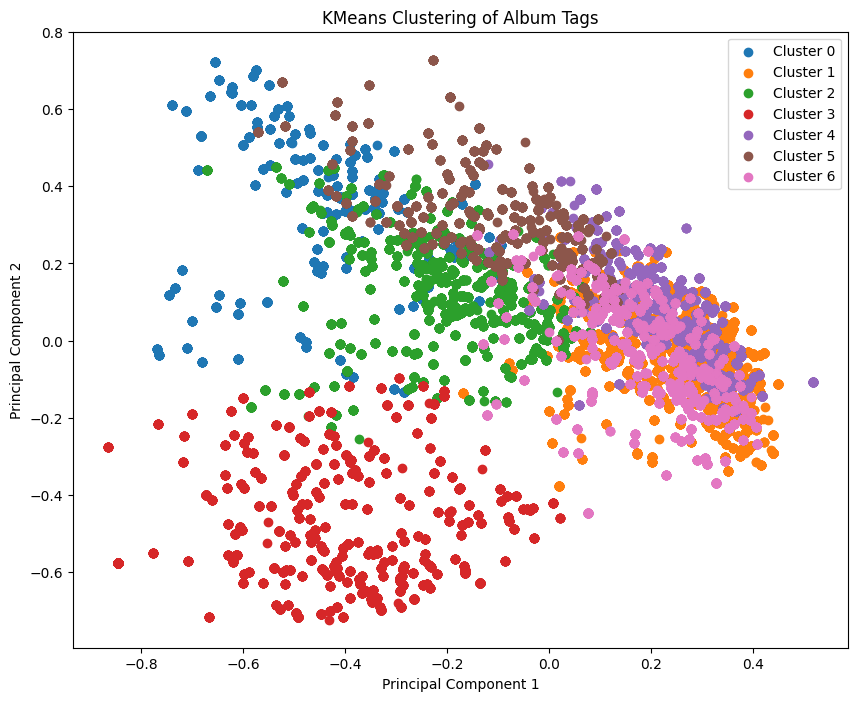

In [ ]:
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(albums_df['tag_embedding'].tolist())


# Create a scatter plot of the clusters
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_result[albums_df['cluster'] == i, 0], pca_result[albums_df['cluster'] == i, 1], label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Album Tags')
plt.legend()
plt.savefig("kmeans_clustering.png")
plt.show()

In [ ]:
import random

def print_random_songs_from_clusters(albums_df, num_clusters, num_songs=10):
    """Prints a specified number of random songs from each cluster.

    Args:
        albums_df: DataFrame containing album information and cluster assignments.
        num_clusters: The total number of clusters.
        num_songs: The number of random songs to print from each cluster.
    """

    for i in range(num_clusters):
        cluster_songs = albums_df[albums_df['cluster'] == i]
        if not cluster_songs.empty:  # Check if the cluster has any songs
          random_indices = random.sample(range(len(cluster_songs)), min(num_songs, len(cluster_songs)))
          print(f"Cluster {i}:")
          for index in random_indices:
            print(cluster_songs.iloc[index]['tracks'])  # Assuming 'name' column contains song names
        else:
            print(f"Cluster {i} is empty.")
        print("-" * 20)

# Assuming num_clusters is defined (e.g., num_clusters = 7 from your code)
print_random_songs_from_clusters(albums_df, num_clusters)

Cluster 0:
Fell for You
Bodies
last november
The Approaching Curve
The 11th Hour
Lorelei
Half-Truism
TELL ME ABOUT TOMORROW
Burnout
The Bitter End
--------------------
Cluster 1:
20201228
Monday Morning - Live
3D (feat. Jack Harlow)
Intro
1984 - 2015 Remastered Version
I'm Sorry
Ships (Original Mix)
Beauty
1963 (12" Version)
GTA
--------------------
Cluster 2:
Look Around
Como 2 E 2 - Live From Teatro Tereza Raquel, Brazil/1971
Love Bites (So Do I)
Happiness Is a Warm Gun - Remastered 2009
The Dogs of War
Killer Queen
The Getaway
Hollywood
The Thin Ice
Love You To - Take 7
--------------------
Cluster 3:
Strength of the World
Cursed Realms Of The Winterdemons
Disobedience
From Dusk Till Dawn
Life Eternal
Almost Easy
Zombie Ritual
The Loss And Curse Of Reverence
Guarded
Waters of Ain
--------------------
Cluster 4:
Your Heart Is As Black As Night
One by One
Pasan los días
Jane Doe
Find Me a Man
Final Hour
Deepest Of Hearts
How Will I Know
Alba II (Live & Acoustic)
Try (Just a Little Bit

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def find_closest_song(albums_df, target_song):
    """
    Finds the closest song to the target song based on cosine similarity of tag embeddings.

    Args:
        albums_df: DataFrame containing album information, including 'tracks' and 'tag_embedding'.
        target_song: The name of the target song.

    Returns:
        The name of the closest song or None if the target song is not found.
    """

    # Find the target song in the DataFrame
    target_song_index = albums_df[albums_df['tracks'].str.contains(target_song, na=False)].index

    if not target_song_index.empty:  # Check if the target song exists
        target_song_embedding = albums_df.loc[target_song_index[0], 'tag_embedding']

        # Calculate cosine similarity between the target song and all other songs
        similarities = []
        for index, row in albums_df.iterrows():
          try:
              similarity = cosine_similarity([target_song_embedding], [row['tag_embedding']])[0][0]
          except ValueError as e: #For handling cases of empty embeddings.
            similarity = 0.0
          similarities.append(similarity)

        # Exclude the target song itself from the similarity calculation
        similarities[target_song_index[0]] = -1

        # Find the index of the song with the highest similarity
        closest_song_index = np.argmax(similarities)

        # Return the name of the closest song
        return albums_df.iloc[closest_song_index]['tracks']
    else:
        return None

# Example usage:
target_song = "Kiss Me On My Neck"
closest_song = find_closest_song(albums_df, target_song)

if closest_song:
    print(f"The closest song to '{target_song}' is: {closest_song}")
else:
    print(f"Song '{target_song}' not found in the dataset.")

The closest song to 'Kiss Me On My Neck' is: Penitentiary Philosophy


In [ ]:
def print_top_songs_per_cluster(albums_df, num_songs=5):
    """Prints top songs from each cluster based on playcount.

    Args:
        albums_df: DataFrame with 'cluster', 'playcount', and song title.
        num_songs: Number of top songs to print per cluster.
    """

    # Calculate the 99th percentile of playcount
    percentile_99 = albums_df['playcount'].quantile(0.99)
    print(f"99th Percentile Playcount: {percentile_99}")

    # Filter for songs in the top 1%
    top_1_percent = albums_df[albums_df['playcount'] >= percentile_99]


    for cluster_id in top_1_percent['cluster'].unique():
        cluster_songs = top_1_percent[top_1_percent['cluster'] == cluster_id]

        # Sort by playcount in descending order and take the top 'num_songs'
        top_songs = cluster_songs.sort_values(by='playcount', ascending=False).head(num_songs)

        print(f"\nTop {num_songs} songs in Cluster {cluster_id}:")
        for index, row in top_songs.iterrows():
            print(f"- {row['tracks']} (Playcount: {row['playcount']})")


print_top_songs_per_cluster(albums_df)

99th Percentile Playcount: 65759215.0

Top 5 songs in Cluster 6:
- One More Time (Playcount: 85024496)
- Something About Us (Playcount: 85024496)
- Aerodynamic (Playcount: 85024496)
- Too Long (Playcount: 85024496)
- Face to Face (Playcount: 85024496)

Top 5 songs in Cluster 1:
- Please Don't Change (feat. DJ Snake) (Playcount: 209564604)
- Somebody (Playcount: 209564604)
- Too Sad to Dance (Playcount: 209564604)
- Yes or No (Playcount: 209564604)
- Standing Next To You (Playcount: 209564604)

Top 5 songs in Cluster 5:
- Texas Reznikoff (Playcount: 76958244)
- Townie (Playcount: 76958244)
- Carry Me Out (Playcount: 76958244)
- I Will (Playcount: 76958244)
- Drunk Walk Home (Playcount: 76958244)

Top 5 songs in Cluster 2:
- Speak to Me (Playcount: 69696134)
- Breathe (In the Air) (Playcount: 69696134)
- On the Run (Playcount: 69696134)
- Time (Playcount: 69696134)
- The Great Gig in the Sky (Playcount: 69696134)

Top 5 songs in Cluster 4:
- Rolling in the Deep (Playcount: 88278026)
- Ru

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_network(albums_df, artists_df):
    """
    Creates a network graph with nodes representing tags, artists, and albums.

    Args:
        albums_df: DataFrame containing album information, including tags.
        artists_df: DataFrame containing artist information, including tags.

    Returns:
        A NetworkX graph object.
    """

    graph = nx.Graph()

    # Add nodes for tags
    for tags in albums_df['tags']:
        for tag in tags.replace('[', '').replace(']', '').replace("'", '').split(', '):
            tag = tag.strip()  # Remove leading/trailing whitespace
            if tag:  # Check if tag is not empty
                graph.add_node(tag, type='tag')

    for tracks in albums_df['tracks']:
        graph.add_node(tracks.lower(), type='track')

    for tags in artists_df['tags']:
        for tag in tags.replace('[', '').replace(']', '').replace("'", '').split(', '):
            tag = tag.strip()
            if tag:
                graph.add_node(tag, type='tag')


    # Add nodes for artists and albums and connect them to tags
    for index, row in albums_df.iterrows():
        album_name = row['album'].lower()
        track_name = row['tracks'].lower()
        artist_name = row['artist'].lower()
        tags = row['tags'].replace('[', '').replace(']', '').replace("'", '').split(', ')
        graph.add_node(album_name, type='album')
        graph.add_edge(album_name, artist_name)
        graph.add_edge(track_name, artist_name)
        graph.add_edge(track_name, album_name)

        for tag in tags:
            tag = tag.strip().lower()
            if tag:
                graph.add_edge(track_name, tag)

    for index, row in artists_df.iterrows():
        artist_name = row['Name'].lower()
        tags = row['tags'].replace('[', '').replace(']', '').replace("'", '').split(', ')

        #Ensure artist node is added
        if not graph.has_node(artist_name):
            graph.add_node(artist_name, type='artist')

        for tag in tags:
            tag = tag.strip()
            if tag:
                graph.add_edge(artist_name, tag)

    return graph


# Example usage (assuming you have albums_df and artists_df from previous code)
music_network = create_network(albums_df, artists_df)

In [ ]:
music_network.number_of_nodes()

42366

In [ ]:
music_network.number_of_edges()

246842

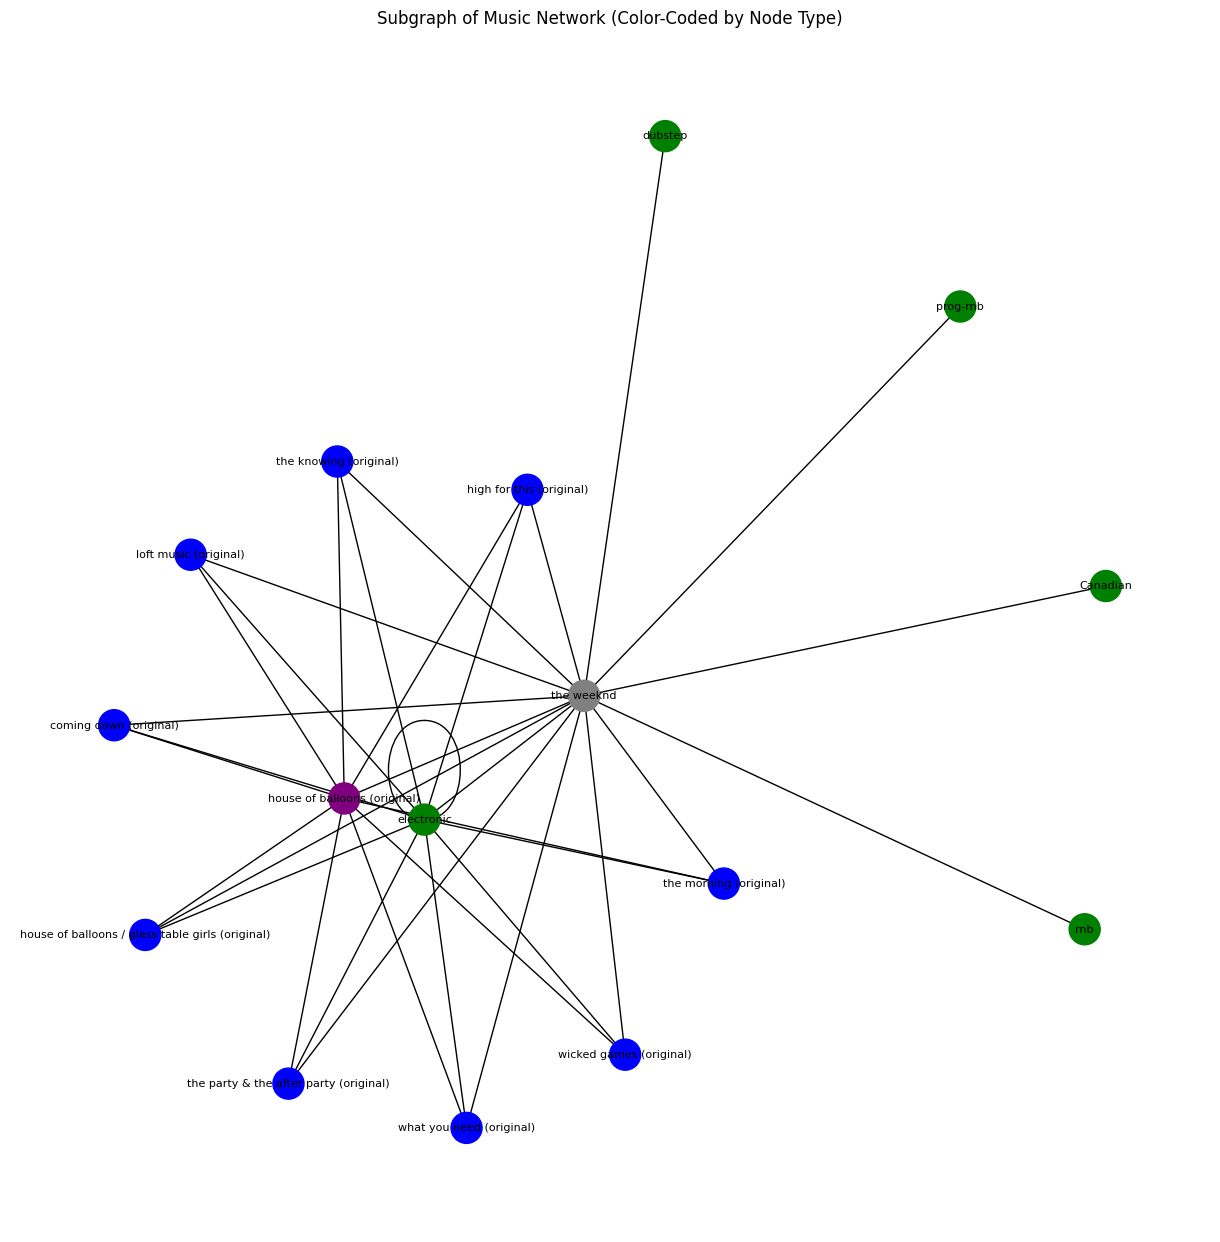

In [ ]:
import matplotlib.pyplot as plt

# Select a small subset of nodes for visualization (e.g., nodes connected to 'the weeknd')
subset_nodes = ['the weeknd']
for node in music_network.neighbors('the weeknd'):
    subset_nodes.append(node)

# Create a subgraph with the selected nodes and their connections
subset_graph = music_network.subgraph(subset_nodes)

# Assign colors based on node type
node_colors = []
for node in subset_graph.nodes:
    node_type = subset_graph.nodes[node].get('type', 'unknown')
    if node_type == 'artist':
        node_colors.append('red')
    elif node_type == 'track':
        node_colors.append('blue')
    elif node_type == 'tag':
        node_colors.append('green')
    elif node_type == 'album':
        node_colors.append('purple')
    else:
        node_colors.append('gray')  # Default color for unknown types

# Draw the subgraph with color-coded nodes
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subset_graph)  # Use a layout algorithm
nx.draw(
    subset_graph,
    pos,
    with_labels=True,
    node_size=500,
    node_color=node_colors,
    font_size=8
)
plt.title("Subgraph of Music Network (Color-Coded by Node Type)")
plt.savefig("music_network_subgraph.png")
plt.show()


In [ ]:
!pip install node2vec

In [ ]:
from node2vec import Node2Vec

# Generate walks
node2vec = Node2Vec(music_network, dimensions=10, walk_length=5, num_walks=5, workers=1)

# Embed the nodes
model = node2vec.fit(window=2, min_count=1, batch_words=1)

#model.save("song_embeddings.model") # Save the model

Computing transition probabilities:   0%|          | 0/42366 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 5/5 [01:30<00:00, 18.02s/it]


In [ ]:
# Function to get embedding for a song
def get_song_embedding(song_name, model):
    try:
        return model.wv[song_name.lower()]  # Use .lower() for consistency
    except KeyError:
        print(f"Warning: Embedding not found for song '{song_name}'. Returning a zero vector.")
        return np.zeros(model.wv.vector_size)

# Apply the function to each song in the DataFrame
albums_df['node2vec_embedding'] = albums_df['tracks'].apply(lambda x: get_song_embedding(x, model))

# Now the 'albums_df' DataFrame contains a new column 'node2vec_embedding' with the embeddings.
albums_df.head()

,artist,album,mbid,listeners,playcount,tracks,tags,similar_tracks,tag_embedding,cluster,node2vec_embedding
0,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Duvet,"['anime', 'serial experiments lain', 'british'...","Komm, Susser Tod (M-10 Director's Edit Version...","[0.021059672037760418, 0.032468159993489586, 0...",2,"[0.18105717, -0.29454777, 0.30366448, -0.11398..."
1,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Twilight,"['anime', 'serial experiments lain', 'british'...","Elephant, Deeply, Brand New City, Advice, Just...","[0.021059672037760418, 0.032468159993489586, 0...",2,"[0.57199824, -0.9911168, 0.6435253, -0.2119915..."
2,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Fool,"['anime', 'serial experiments lain', 'british'...","Rain, Scoring","[0.021059672037760418, 0.032468159993489586, 0...",2,"[0.2689646, -0.30744958, 0.3404702, -0.0830614..."
3,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Rain,"['anime', 'serial experiments lain', 'british'...","Scoring, Fool","[0.021059672037760418, 0.032468159993489586, 0...",2,"[0.31330046, -0.23740454, 0.029008605, -0.2259..."
4,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Elephant,"['anime', 'serial experiments lain', 'british'...","Rain, Fool","[0.021059672037760418, 0.032468159993489586, 0...",2,"[0.39970055, -0.46797574, 0.2701075, -0.206510..."


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def find_closest_songs(albums_df, target_song, top_n=5):
    """
    Finds the top_n closest songs to the target song based on cosine similarity of node2vec embeddings.

    Args:
        albums_df: DataFrame containing album information, including 'tracks' and 'node2vec_embedding'.
        target_song: The name of the target song.
        top_n: The number of closest songs to return.

    Returns:
        A list of tuples, where each tuple contains the name of a song and its cosine similarity to the target song.
        Returns an empty list if the target song is not found or if there's an error.
    """

    try:
        # Find the target song in the DataFrame
        target_song_index = albums_df[albums_df['tracks'].str.contains(target_song, na=False)].index
        if target_song_index.empty:
            print(f"Song '{target_song}' not found in the dataset.")
            return []

        target_song_embedding = albums_df.loc[target_song_index[0], 'node2vec_embedding']

        # Calculate cosine similarity between the target song and all other songs
        similarities = []
        for index, row in albums_df.iterrows():
            try:
                similarity = cosine_similarity([target_song_embedding], [row['node2vec_embedding']])[0][0]
                similarities.append((row['tracks'], similarity))
            except ValueError as e:
                print(f"Error calculating similarity for song {row['tracks']}: {e}")
                similarities.append((row['tracks'], 0.0))  # Assign 0 similarity in case of error


        # Sort songs by similarity in descending order
        similarities.sort(key=lambda x: x[1], reverse=True)

        # Exclude the target song itself
        closest_songs = [song for song in similarities if song[0] != target_song][:top_n]

        return closest_songs
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Example usage
target_song = "Kiss Me On My Neck" # Example song
closest_songs = find_closest_songs(albums_df, target_song)

if closest_songs:
    print(f"The {len(closest_songs)} closest songs to '{target_song}' are:")
    for song, similarity in closest_songs:
        print(f"- {song} (Similarity: {similarity:.4f})")

The 5 closest songs to 'Kiss Me On My Neck' are:
- Kiss Me On My Neck (Hesi) (Similarity: 1.0000)
- I Don't Do Drugs (Similarity: 0.9892)
- Caeu (Similarity: 0.9882)
- I Love Me Some Him (Similarity: 0.9872)
- Umbrella (Similarity: 0.9868)


In [ ]:
from sklearn.cluster import KMeans

# Assuming 'track_vector' column exists in albums_df and contains NumPy arrays
track_vectors = albums_df['node2vec_embedding'].tolist()

# Perform KMeans clustering with k=7
kmeans = KMeans(n_clusters=7, random_state=0, n_init=10)
kmeans.fit(track_vectors)

# Add cluster labels to the DataFrame
albums_df['track_cluster'] = kmeans.labels_

# Print the updated DataFrame with cluster assignments
albums_df.head()

,artist,album,mbid,listeners,playcount,tracks,tags,similar_tracks,tag_embedding,cluster,node2vec_embedding,track_cluster
0,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Duvet,"['anime', 'serial experiments lain', 'british'...","Komm, Susser Tod (M-10 Director's Edit Version...","[0.021059672037760418, 0.032468159993489586, 0...",2,"[0.18105717, -0.29454777, 0.30366448, -0.11398...",6
1,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Twilight,"['anime', 'serial experiments lain', 'british'...","Elephant, Deeply, Brand New City, Advice, Just...","[0.021059672037760418, 0.032468159993489586, 0...",2,"[0.57199824, -0.9911168, 0.6435253, -0.2119915...",6
2,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Fool,"['anime', 'serial experiments lain', 'british'...","Rain, Scoring","[0.021059672037760418, 0.032468159993489586, 0...",2,"[0.2689646, -0.30744958, 0.3404702, -0.0830614...",6
3,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Rain,"['anime', 'serial experiments lain', 'british'...","Scoring, Fool","[0.021059672037760418, 0.032468159993489586, 0...",2,"[0.31330046, -0.23740454, 0.029008605, -0.2259...",3
4,bôa,Twilight,311ad921-98dc-43d5-ad37-ceba57618f52,1284128,41634675,Elephant,"['anime', 'serial experiments lain', 'british'...","Rain, Fool","[0.021059672037760418, 0.032468159993489586, 0...",2,"[0.39970055, -0.46797574, 0.2701075, -0.206510...",3


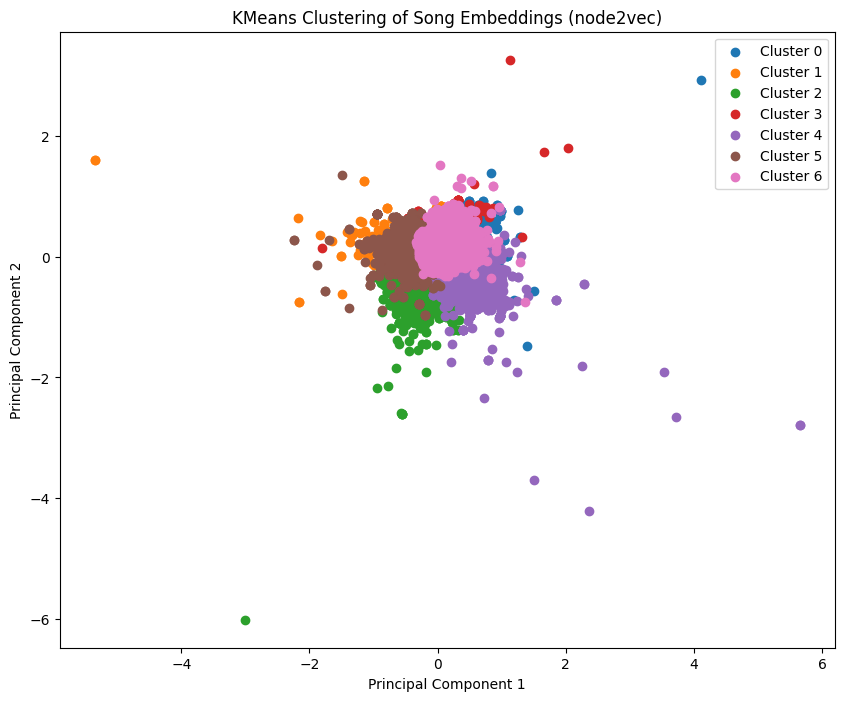

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(albums_df['node2vec_embedding'].tolist())

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 8))
for i in range(7):  # Assuming 7 clusters
    plt.scatter(pca_result[albums_df['track_cluster'] == i, 0], pca_result[albums_df['track_cluster'] == i, 1], label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Song Embeddings (node2vec)')
plt.legend()
plt.savefig("kmeans_clustering_node2vec.png")
plt.show()

In [ ]:
def evaluate_closest_song(albums_df):
    """
    Evaluates the accuracy of finding the closest song based on node2vec embeddings
    compared to the 'similar_tracks' column.

    Args:
        albums_df: DataFrame with 'tracks', 'node2vec_embedding', and 'similar_tracks' columns.

    Returns:
        The accuracy of the closest song prediction.
    """

    correct_predictions = 0
    total_predictions = 0

    for index, row in albums_df[:100].iterrows():
        target_song = row['tracks'].replace('(', '').replace(')', '')
        similar_tracks = row['similar_tracks']  # Assuming this column contains a list of similar tracks

        if pd.notna(similar_tracks): #Check for null values
          closest_songs = find_closest_songs(albums_df, target_song, top_n=1)
          print('done')
          if closest_songs:
              closest_song = closest_songs[0][0]  # Get the name of the closest song

              if closest_song in similar_tracks:
                  correct_predictions += 1

              total_predictions += 1

    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    return accuracy


# Assuming albums_df has been loaded and preprocessed as in the provided code.
# Add a 'similar_tracks' column for demonstration (replace with actual similar tracks)

# Example similar_tracks column (replace with your actual data).
# You would load similar tracks from a file or another data source.
#albums_df['similar_tracks'] = [['Song2', 'Song3'], ['Song1', 'Song5'], ['Song6']]


accuracy = evaluate_closest_song(albums_df)
print(f"Accuracy of closest song prediction: {accuracy:.4f}")

done
done
done
done
done
done
done
done
done
done
done
Song 'Duvet acoustic' not found in the dataset.
done
done
done
done
done
done
done
done
Song 'I Want You She's So Heavy - Remastered 2009' not found in the dataset.
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
Song 'Never Going Back Again - Instrumental' not found in the dataset.
done
Song 'Second Hand News Sessions, Roughs & Outtakes - 2004 Remastered Edition' not found in the dataset.
done
Song 'Dreams Sessions, Roughs & Outtakes' not found in the dataset.
done
Song 'Brushes Never Going Back Again [Sessions, Roughs & Outtakes]' not found in the dataset.
done
Song 'Don't Stop Sessions, Roughs & Outtakes - 2004 Remastered Edition' not found in the dataset.
done
Song 

In [ ]:
target_song = "Kiss Me On My Neck"
closest_song = find_closest_songs(albums_df, target_song)

if closest_song:
    print(f"The closest song to '{target_song}' is: {closest_song}")
else:
    print(f"Song '{target_song}' not found in the dataset.")

The closest song to 'Kiss Me On My Neck' is: [('Kiss Me On My Neck (Hesi)', 1.0000001), ("I Don't Do Drugs", 0.9891889), ('Caeu', 0.98820883), ('I Love Me Some Him', 0.9871907), ('Umbrella', 0.9867877)]


In [ ]:
# prompt: give me 3 random songs from each cluster

def print_random_songs_from_clusters(albums_df, num_clusters, num_songs=3):
    """Prints a specified number of random songs from each cluster.

    Args:
        albums_df: DataFrame containing album information and cluster assignments.
        num_clusters: The total number of clusters.
        num_songs: The number of random songs to print from each cluster.
    """

    for i in range(num_clusters):
        cluster_songs = albums_df[albums_df['track_cluster'] == i]
        if not cluster_songs.empty:  # Check if the cluster has any songs
            random_indices = random.sample(range(len(cluster_songs)), min(num_songs, len(cluster_songs)))
            print(f"Cluster {i}:")
            for index in random_indices:
                print(cluster_songs.iloc[index]['tracks'])  # Assuming 'name' column contains song names
        else:
            print(f"Cluster {i} is empty.")
        print("-" * 20)

print_random_songs_from_clusters(albums_df, 7, 3)

Cluster 0:
Chamber the Cartridge
The Handshake
no pressure
--------------------
Cluster 1:
Get It Together (feat. Bread & Water)
Under My Sensi
Your Love
--------------------
Cluster 2:
Waiting for Never
Superman (feat. Dina Rae)
Numb/Encore
--------------------
Cluster 3:
Lost in Paris
I Heard It Through the Grapevine
Moth
--------------------
Cluster 4:
Welcome to the Family
In My Pockets
Alone
--------------------
Cluster 5:
Underground
Song / echo
Arena
--------------------
Cluster 6:
Movin' Out
Ooh La
Getting Sodas
--------------------
